<a href="https://colab.research.google.com/github/Henil21/University-Research/blob/main/ITM_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MRI Classification using CNN
**Index**

```
1. Fetching data ⛅ 
2. Helper function for visualizing  our data 🆘
3. visualizing the training data distribution 🔎
4. pre processing ⚙
5. Lets step into modeling 🕺
6. Helperfunction for plotting loss curves 📉
7. Adam V/S RMSprop 🤜
```
```
2.0  Brain MRI Classification 🧠
2.1  visualizing  our data 🔍
2.2  pre processing ⚙
2.3 Model Building 🕺
2.4 Plottin Loss 📉
```

In [1]:
!nvidia-smi  -L
# making sure GPU is connected ✅

GPU 0: Tesla T4 (UUID: GPU-b4e756de-db68-c147-1a61-a75ecd8e6259)


##*1 Getting the data ⛅*

In [2]:
#fetching the data from cloud
Chest_train='/content/drive/MyDrive/Chest/'
Chest_test='/content/drive/MyDrive/Chest-Test'

##2  *Helper function for Visualizing*🆘

In [3]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):
 
   # getting class vise dir link
   target=target_dir+target_class

   # taking 1 random image from a list of all images under a class
   random_img=random.sample(os.listdir(target),1)

   #as we have stored it in list we need to access it through index which is zero
   image=mpimg.imread(target+'/'+random_img[0])

   fig = plt.figure(figsize=(5, 2))  # Set the width and height of the figure

   
   #plotting image
   plt.imshow(image)
   
   plt.axis("off")
   print(f"img shape:{image.shape}")

img shape:(200, 300)


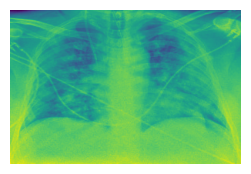

In [4]:
view_random_image(target_dir=Chest_train,target_class='COVID-19')

## 3 Lets visualize the distribution of the training data 🔍

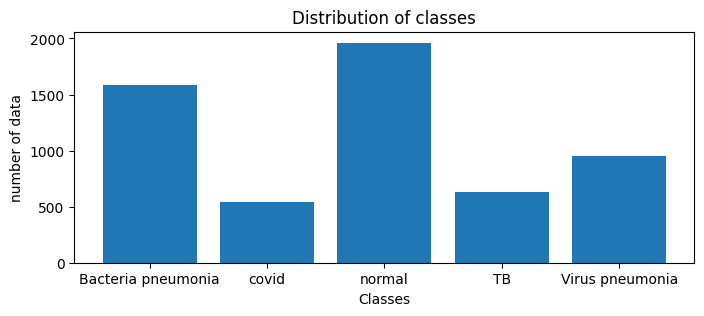

In [5]:

# getting length of the sub classes
BAC_n=len(os.listdir('/content/drive/MyDrive/Chest/Bacteria pneumonia'))
COVID=len(os.listdir('/content/drive/MyDrive/Chest/COVID-19'))
Normal=len(os.listdir('/content/drive/MyDrive/Chest/NORMAL'))
TB=len(os.listdir('/content/drive/MyDrive/Chest/Tuberculosis'))
virus_n=len(os.listdir('/content/drive/MyDrive/Chest/Virus pneumonia'))

classes=['Bacteria pneumonia', "covid",'normal','TB','Virus pneumonia']
values=[BAC_n,COVID,Normal,TB,virus_n]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)
 
# Adding title to the plot
plt.title("Distribution of classes")
 
# Adding label on the y-axis
plt.ylabel('number of data')
 
# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

## 4.Pre-processing ⚙

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# recaling pixels 
train_data_gen = ImageDataGenerator(rescale=1./255)

# dividing into batches and  
train_generator = train_data_gen.flow_from_directory(
    Chest_train,
    target_size=(224,224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical' # we are working with multiclass problem
)


# recaling pixels 
test_data_gen = ImageDataGenerator(rescale=1./255
                                                              )

# dividing into batches and  
test_generator = train_data_gen.flow_from_directory(
    Chest_test,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical' # we are working with multiclass problem
)

Found 5669 images belonging to 5 classes.
Found 1395 images belonging to 5 classes.


In [7]:
import os

# Specify the path to the directory you want to list subdirectories for
directory_path = '/content/drive/MyDrive/Chest-Test'

# Use the os.listdir() function to get a list of all items (files and directories) in the specified directory
items = os.listdir(directory_path)

# Iterate over the items and check if they are directories
subdirectories = []
for item in items:
    item_path = os.path.join(directory_path, item)
    if os.path.isdir(item_path):
        subdirectories.append(item)

# Print the list of subdirectories
print(subdirectories)


['Tuberculosis', 'COVID-19', 'NORMAL', 'Bacteria pneumonia', 'Virus pneumonia']


> we got 5669 images divided into 5 sub-classes for training 

> 1395 images divided into 5 sub-classes for testing

> total image [training+test]= 7064

run below cell if u wanna see numeric representation

In [8]:
train_generator[0]

(array([[[[0.40784317, 0.40784317, 0.40784317],
          [0.3254902 , 0.3254902 , 0.3254902 ],
          [0.34117648, 0.34117648, 0.34117648],
          ...,
          [0.25882354, 0.25882354, 0.25882354],
          [0.227451  , 0.227451  , 0.227451  ],
          [0.16862746, 0.16862746, 0.16862746]],
 
         [[0.3529412 , 0.3529412 , 0.3529412 ],
          [0.36862746, 0.36862746, 0.36862746],
          [0.3529412 , 0.3529412 , 0.3529412 ],
          ...,
          [0.25490198, 0.25490198, 0.25490198],
          [0.24313727, 0.24313727, 0.24313727],
          [0.23137257, 0.23137257, 0.23137257]],
 
         [[0.35686275, 0.35686275, 0.35686275],
          [0.43529415, 0.43529415, 0.43529415],
          [0.38823533, 0.38823533, 0.38823533],
          ...,
          [0.2509804 , 0.2509804 , 0.2509804 ],
          [0.24705884, 0.24705884, 0.24705884],
          [0.20784315, 0.20784315, 0.20784315]],
 
         ...,
 
         [[0.06666667, 0.06666667, 0.06666667],
          [0.07058

## **5. Lets step into modeling 🕺**

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential


tf.random.set_seed(42) #why 42? because it is Answer to the Ultimate Question of Life, the Universe, and Everything if you know you know 

Model_1=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # softmax as we are working with multiclass problem
])


In [10]:
Model_1.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 


In [11]:
history=Model_1.fit(train_generator, 
                   epochs=10,
                    steps_per_epoch=len(train_generator ), 
                   validation_data=(test_generator),
                   validation_steps=len(test_generator ))

Epoch 1/10
178/178 [==============================] - 1670s 9s/step - loss: 1.0608 - accuracy: 0.5678 - val_loss: 0.8874 - val_accuracy: 0.6545
Epoch 2/10
178/178 [==============================] - 26s 145ms/step - loss: 0.6968 - accuracy: 0.7324 - val_loss: 0.5967 - val_accuracy: 0.7484
Epoch 3/10
178/178 [==============================] - 25s 139ms/step - loss: 0.5754 - accuracy: 0.7673 - val_loss: 0.4993 - val_accuracy: 0.7756
Epoch 4/10
178/178 [==============================] - 25s 140ms/step - loss: 0.5052 - accuracy: 0.7971 - val_loss: 0.4984 - val_accuracy: 0.8014
Epoch 5/10
178/178 [==============================] - 26s 143ms/step - loss: 0.4574 - accuracy: 0.8247 - val_loss: 0.5251 - val_accuracy: 0.7842
Epoch 6/10
178/178 [==============================] - 25s 140ms/step - loss: 0.4170 - accuracy: 0.8386 - val_loss: 0.4401 - val_accuracy: 0.8151
Epoch 7/10
178/178 [==============================] - 25s 143ms/step - loss: 0.3783 - accuracy: 0.8527 - val_loss: 0.4530 - val_acc

> accuracy with RMSprop() us 83% for 10 epoch lets check adam()

## 6.helperfunction for plotting loss curves 📉

In [12]:
import pandas as pd
def plot_loss_curves(hist):
    pd.DataFrame(hist.history).plot(figsize=(5,5))

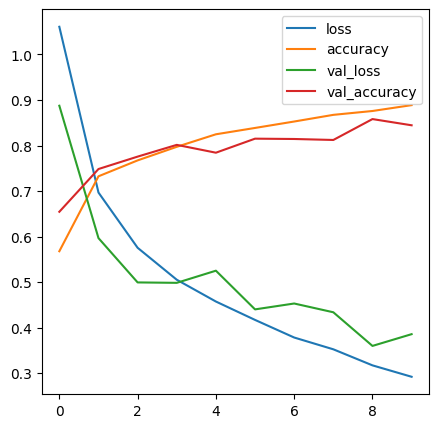

In [13]:
plot_loss_curves(history)

## 7.Adam V/S RMSprop 🤜

In [14]:
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_2=Model_2.fit(train_generator, 
                   epochs=10,
                    steps_per_epoch=len(train_generator ), 
                   validation_data=(test_generator),
                   validation_steps=len(test_generator ))

Epoch 1/10
178/178 [==============================] - 27s 141ms/step - loss: 0.9667 - accuracy: 0.6022 - val_loss: 0.6806 - val_accuracy: 0.7369
Epoch 2/10
178/178 [==============================] - 26s 145ms/step - loss: 0.5927 - accuracy: 0.7640 - val_loss: 0.5283 - val_accuracy: 0.7692
Epoch 3/10
178/178 [==============================] - 24s 137ms/step - loss: 0.5212 - accuracy: 0.7987 - val_loss: 0.5435 - val_accuracy: 0.7670
Epoch 4/10
178/178 [==============================] - 25s 140ms/step - loss: 0.4425 - accuracy: 0.8331 - val_loss: 0.5256 - val_accuracy: 0.7828
Epoch 5/10
178/178 [==============================] - 25s 143ms/step - loss: 0.3976 - accuracy: 0.8536 - val_loss: 0.4196 - val_accuracy: 0.8194
Epoch 6/10
178/178 [==============================] - 25s 139ms/step - loss: 0.3514 - accuracy: 0.8636 - val_loss: 0.4430 - val_accuracy: 0.8186
Epoch 7/10
178/178 [==============================] - 26s 144ms/step - loss: 0.3215 - accuracy: 0.8753 - val_loss: 0.4075 - val_ac

>  we are getting 86% accuracy with adam with same model architecture 

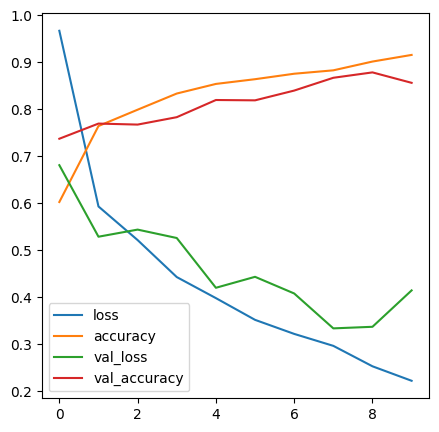

In [15]:
plot_loss_curves(history_2)

#2.0  Brain MRI Classification 🧠

In [16]:
Brain_train='/content/drive/MyDrive/Brain_multiclass/Training/'
Brain_test='/content/drive/MyDrive/Brain_multiclass/Testing/'

## 2.1 visualizing  our data **🔍**

img shape:(512, 512)


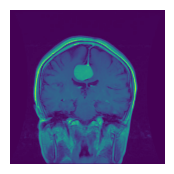

In [17]:
view_random_image(target_dir=Brain_train,target_class='meningioma')

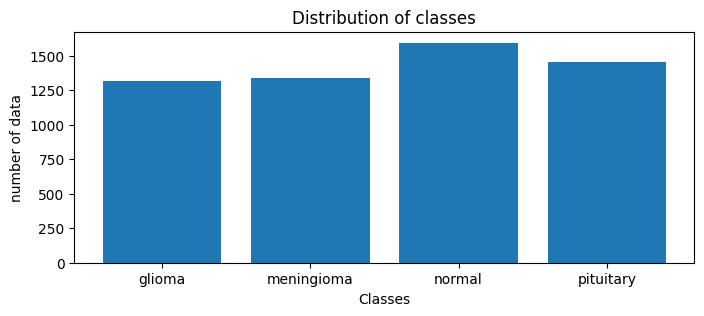

In [18]:

# getting length of the sub classes
gol=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/glioma'))
men=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/meningioma'))
Normal=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/notumor'))
pit=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/pituitary'))

classes=['glioma', "meningioma",'normal','pituitary']
values=[gol,men,Normal,pit]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)
 
# Adding title to the plot
plt.title("Distribution of classes")
 
# Adding label on the y-axis
plt.ylabel('number of data')
 
# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

## 2.2 Pre-processing ⚙

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# recaling pixels 
train_data_gen = ImageDataGenerator(rescale=1./255)

# dividing into batches and  
train_generator_brain = train_data_gen.flow_from_directory(
    Brain_train,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical' # we are working with multiclass problem
)


# recaling pixels 
test_data_gen_brain = ImageDataGenerator(rescale=1./255)

# dividing into batches and  
test_generator_brain = train_data_gen.flow_from_directory(
    Brain_test,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical' # we are working with multiclass problem
)

Found 5712 images belonging to 4 classes.
Found 1316 images belonging to 4 classes.


In [20]:
# train_generator[0] 


## 2.3 Model Building 🕺

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_2=Model_2.fit(train_generator_brain, 
                   epochs=10,
                    steps_per_epoch=len(# dividing into batches and  
                  train_generator_brain  ), 
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

Epoch 1/10
179/179 [==============================] - 36s 185ms/step - loss: 0.6160 - accuracy: 0.7535 - val_loss: 0.4443 - val_accuracy: 0.8442
Epoch 2/10
179/179 [==============================] - 38s 213ms/step - loss: 0.2874 - accuracy: 0.8969 - val_loss: 0.3454 - val_accuracy: 0.8746
Epoch 3/10
179/179 [==============================] - 33s 182ms/step - loss: 0.1731 - accuracy: 0.9433 - val_loss: 0.2876 - val_accuracy: 0.8906
Epoch 4/10
179/179 [==============================] - 32s 182ms/step - loss: 0.0834 - accuracy: 0.9744 - val_loss: 0.1910 - val_accuracy: 0.9415
Epoch 5/10
179/179 [==============================] - 38s 210ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.2182 - val_accuracy: 0.9407
Epoch 6/10
179/179 [==============================] - 32s 180ms/step - loss: 0.0396 - accuracy: 0.9886 - val_loss: 0.2276 - val_accuracy: 0.9438
Epoch 7/10
179/179 [==============================] - 38s 210ms/step - loss: 0.0186 - accuracy: 0.9960 - val_loss: 0.2460 - val_ac

## 2.4 Plottin Loss 📉

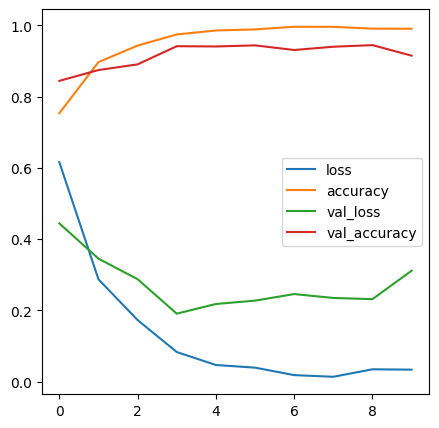

In [22]:
plot_loss_curves(history_2)

## 2.5 RMSprop

In [23]:
model_3=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
# we clone the above model  architecture 
model_3.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_3=Model_2.fit(train_generator_brain, 
                   epochs=10,
                    steps_per_epoch=len(# dividing into batches and  
                  train_generator_brain  ), 
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

Epoch 1/10
179/179 [==============================] - 33s 182ms/step - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.2318 - val_accuracy: 0.9392
Epoch 2/10
179/179 [==============================] - 33s 187ms/step - loss: 0.0050 - accuracy: 0.9995 - val_loss: 0.2559 - val_accuracy: 0.9468
Epoch 3/10
179/179 [==============================] - 32s 179ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2176 - val_accuracy: 0.9498
Epoch 4/10
179/179 [==============================] - 32s 180ms/step - loss: 4.9980e-04 - accuracy: 1.0000 - val_loss: 0.2237 - val_accuracy: 0.9491
Epoch 5/10
179/179 [==============================] - 34s 189ms/step - loss: 3.8161e-04 - accuracy: 1.0000 - val_loss: 0.2288 - val_accuracy: 0.9514
Epoch 6/10
179/179 [==============================] - 33s 184ms/step - loss: 2.9956e-04 - accuracy: 1.0000 - val_loss: 0.2317 - val_accuracy: 0.9514
Epoch 7/10
179/179 [==============================] - 32s 181ms/step - loss: 2.4304e-04 - accuracy: 1.0000 - val_loss: